In [121]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [122]:
def FonsecaFlemingExp(x, a=True):
    if a:
        return np.exp(np.sum(np.negative((x + np.full_like(x, -1./math.sqrt(2)))**2)))
    else:
        return np.exp(np.sum(np.negative((x + np.full_like(x, 1./math.sqrt(2)))**2)))

def FonsecaFleming(x):
    fa = np.negative(np.expm1(np.sum(np.negative((x + np.full_like(x, -1./math.sqrt(2)))**2))))
    fb = np.negative(np.expm1(np.sum(np.negative((x + np.full_like(x, 1./math.sqrt(2)))**2))))
    return np.asarray([fa, fb])

def FonsecaFlemingJac(x):
    Ja = np.multiply(2 * (x + np.full_like(x, -1./math.sqrt(2))), FonsecaFlemingExp(x, True))
    Jb = np.multiply(2 * (x + np.full_like(x, 1./math.sqrt(2))), FonsecaFlemingExp(x, False))
    return np.asarray([Ja, Jb])

In [123]:
def StocSearch(dim =2, max_inner_iter=1000, max_outer_iter=50):
    front =[]
    for j in range(max_outer_iter):
        z = np.random.uniform(low=-2., high=2., size=dim)
        for i in range(max_inner_iter):
            xi = np.random.standard_normal(dim)
            z -= 0.01*FonsecaFlemingJac(z).dot(xi)
        front.append(FonsecaFleming(z))
    return np.asarray(front)

f = StocSearch()

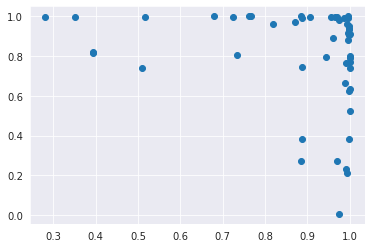

In [124]:
plt.scatter(f[:, 0], f[:, 1])